# Split dataset in training and test

https://github.com/codificandobits/prediction_de_acciones_en_la_bolsa_con_redes_LSTM

Training len: 125
Test len: 57


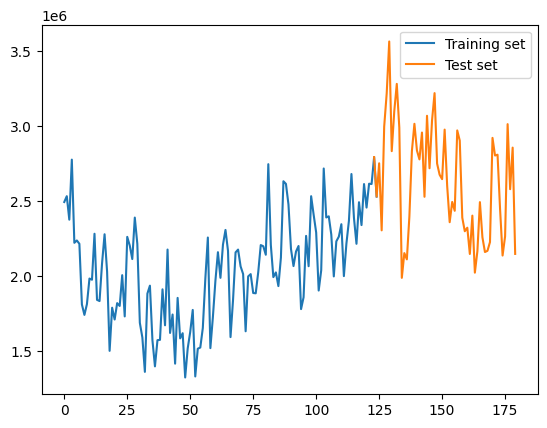

In [2]:

import numpy as np
np.random.seed(4) #Always the same random values (stored in position 4)
import matplotlib.pyplot as plt
import pandas as pd

# Data read
dataset = pd.read_csv('clean_dataset.csv')
dataset.head()

training_percentatge = 0.7 # You could decide the percentatge for training (70%).
dataset_len = len(dataset)
training_len  = int(np.floor(dataset_len*0.7))
test_len = dataset_len - training_len

training_set = dataset[0:training_len].iloc[:,1:2]
print("Training len: {}".format(len(training_set)))

# We create a test set to compare it with the predicted values.
test_set = dataset[training_len - 2:training_len + test_len].iloc[:,1:2]
print("Test len: {}".format(len(test_set)))

training_set['B'].plot(legend=True)
test_set['B'].plot(legend=True)
plt.legend(['Training set', 'Test set'])
plt.show()


# Creating the model

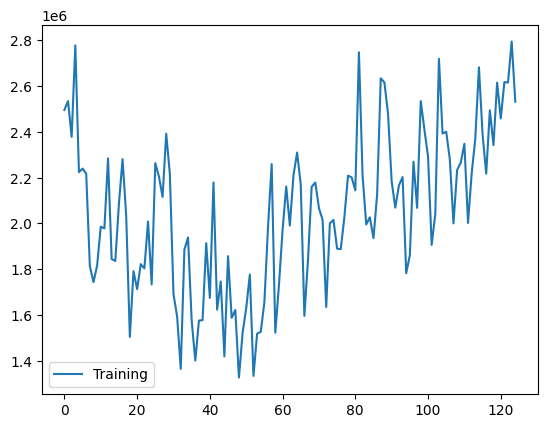

Epoch 1/200
4/4 [==============================] - 3s 3ms/step - loss: 0.3630
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3337
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3134
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2962
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2806
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2662
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2528
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2399
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2275
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2156
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2041
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1926
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


training_set['B'].plot(legend=True)
plt.legend(['Training'])
plt.show()

# training_set normalisation 
sc = MinMaxScaler(feature_range=(0,1))
scalar_training_set = sc.fit_transform(training_set)

time_step = 2 #Number of consecutive data
X_train = []
Y_train = []
m = len(scalar_training_set)

for i in range(time_step,m):
    # X: blocks of "time_step" values: 0-time_step, 1-time_step+1, 2-time_step+2...
    X_train.append(scalar_training_set[i-time_step:i,0])

    # Y: next value
    Y_train.append(scalar_training_set[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train (for Keras)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# LSTM
dim_in = (X_train.shape[1],1)
dim_out = 1
na = 10

model = Sequential()
model.add(LSTM(units=na, input_shape=dim_in))
model.add(Dense(units=dim_out))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train,Y_train,epochs=200,batch_size=32)

# Validation

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 [==============================] - 1s 3ms/step
[[2486528.5]
 [2502937.8]
 [2375181.2]
 [2531844.5]
 [2833752. ]
 [3026711.5]
 [2820776.5]
 [2738314.5]
 [2886891.5]
 [2817997.8]
 [2296892.5]
 [2078638.6]
 [2111972.8]
 [2220094. ]
 [2495254.5]
 [2704765.5]
 [2682543.2]
 [2606648.8]
 [2664221.2]
 [2532420.2]
 [2633208. ]
 [2646387.8]
 [2679970.5]
 [2846050.8]
 [2700268. ]
 [2537498.8]
 [2502513. ]
 [2632372.2]
 [2570021.8]
 [2355450. ]
 [2340053.5]
 [2356421.8]
 [2563912.8]
 [2697863.2]
 [2455482.8]
 [2265018.5]
 [2247430.8]
 [2178982.5]
 [2234112. ]
 [2148815.8]
 [2094675.4]
 [2278076.2]
 [2278664.5]
 [2165000. ]
 [2138425.5]
 [2165822.5]
 [2475701.8]
 [2641765.5]
 [2610076.5]
 [2454792.2]
 [2211861.5]
 [2172313.8]
 [2525338.8]
 [2570163.2]
 [2562100.8]]


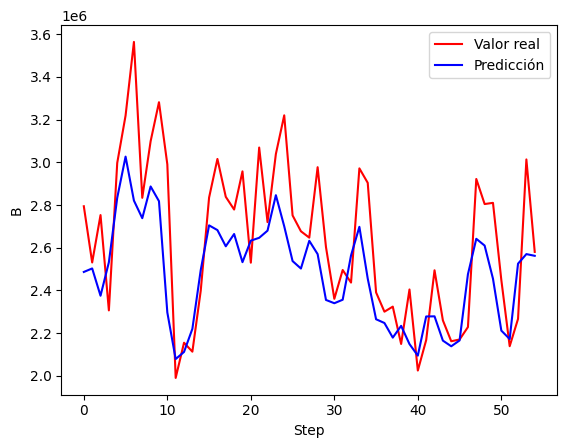

In [7]:
#
# Auxiliar functions.
#
def graficar_predicciones(real, prediccion):
    plt.plot(real[0:len(prediccion)],color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
    # plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Step')
    plt.ylabel('B')
    plt.legend()
    plt.show()

#
# Validation.
#
x_test = test_set.values
x_test = sc.transform(x_test)

X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion = model.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

print(prediccion)

# Graficar resultados
graficar_predicciones(test_set.values,prediccion)